<a href="https://colab.research.google.com/github/nhattminh160901/do_an_ptdl_python/blob/main/thongkesuydien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm

In [ ]:
a = pd.read_csv('Diet_R.csv')
a.sample(10)

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
43,65,0,48,153,75,3,68.7
8,7,0,37,174,67,1,65.0
12,11,0,60,173,72,1,70.5
40,62,0,31,170,72,3,71.1
64,50,1,39,180,80,2,81.4
45,15,1,39,168,71,1,71.6
77,78,1,51,175,88,3,81.9
3,2,0,46,192,60,1,54.0
39,61,0,37,170,70,3,62.7
13,12,0,48,156,72,1,69.0


Tính cân nặng giảm

In [ ]:
a['loseweight'] = a['pre.weight'] - a['weight6weeks']
a_diet_lose = a[['Diet','loseweight']].copy()
a_diet_lose

,Diet,loseweight
0,2,0.0
1,2,0.0
2,1,3.8
3,1,6.0
4,1,0.7
...,...,...
73,3,2.8
74,3,4.1
75,3,5.3
76,3,9.2


SỰ KHÁC NHAU VỀ HIỆU QUẢ CỦA CÁC PHƯƠNG PHÁP GIẢM CÂN

Giải thuyết thống kê:

N0: không có sự khác biệt về hiệu quả giảm cân giữa các phương pháp

N1: có ít nhất hai kiểu phương pháp khác nhau về hiệu quả giảm cân

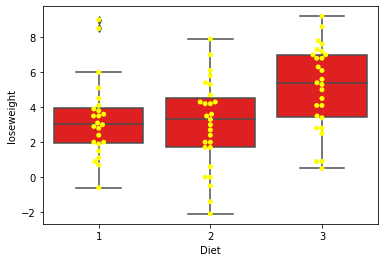

In [ ]:
sns.boxplot(x='Diet',y='loseweight',data = a_diet_lose, color='red')
sns.swarmplot(x='Diet',y='loseweight', data = a_diet_lose, color='yellow')
plt.show()

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
model = ols('loseweight ~ C(Diet)', data=a_diet_lose).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Diet),71.093689,2.0,6.197447,0.003229
Residual,430.179259,75.0,NaN,NaN


In [56]:
def results(p, alpha=0.05):
    cols=['f_score', 'p_value', 'KetLuan']
    if p['p_value'] < alpha:
        p['KetLuan'] = f"Chấp nhận N1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
        p['KetLuan'] = f"Chấp nhận N0 với mức ý nghĩa {alpha}"
    t = pd.DataFrame(p, index=[''])
    return t[cols]
p = {}
p['f_score'] = anova_table['F'][0]
p['p_value'] = anova_table['PR(>F)'][0]
results(p)

,f_score,p_value,KetLuan
,0.043786,0.834827,Chấp nhận N0 với mức ý nghĩa 0.05


Hậu n0

In [57]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

abc = pairwise_tukeyhsd(endog=a_diet_lose['loseweight'], groups=a_diet_lose['Diet'], alpha=0.05)
abc.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-0.2741,0.9,-1.8806,1.3325,False
1,3,1.8481,0.0201,0.2416,3.4547,True
2,3,2.1222,0.0048,0.5636,3.6808,True


Kiểm tra điều kiện cho anova

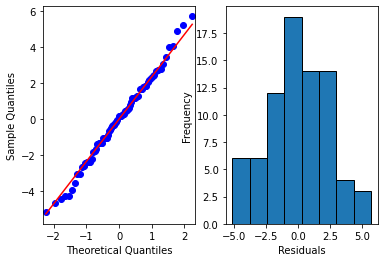

In [ ]:
fig, ax = plt.subplots(1,2)
sm.qqplot(model.resid,line='s', ax=ax[0])
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Residuals")

plt.hist(model.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
p_v = stats.shapiro(model.resid)[1]

Phân phối chuẩn

In [58]:
print('''Phát biểu giả thiết thống kê:
    N0: Mẫu tuân theo phân phối chuẩn
    N1: Mẫu khống tuân theo phân phối chuẩn''')
if p_v > 0.05:
    print(f'Không có bằng chứng thống kê để bác bỏ giả thiết N0. Điều này ngụ ý Mẫu tuân theo phân phối chuẩn')
else:
    print(f'Có bằng chứng thống kê để bác bỏ giả thiết N0. Điều này ngụ ý Mẫu không tuân theo phân phối chuẩn (N1)')

Phát biểu giả thiết thống kê:
    N0: Mẫu tuân theo phân phối chuẩn
    N1: Mẫu khống tuân theo phân phối chuẩn
Không có bằng chứng thống kê để bác bỏ giả thiết N0. Điều này ngụ ý Mẫu tuân theo phân phối chuẩn


In [ ]:
a_gen_loseweight = a[['gender','loseweight']].copy()
a_gen_loseweight = a_gen_loseweight.replace(r'^\s*$', np.nan, regex=True)
a_gen_loseweight = a_gen_loseweight.dropna()
a_gen_loseweight

,gender,loseweight
2,0,3.8
3,0,6.0
4,0,0.7
5,0,2.9
6,0,2.8
...,...,...
73,1,2.8
74,1,4.1
75,1,5.3
76,1,9.2


SỰ KHÁC NHAU VỀ HIỆU QUẢ GIẢM CÂN VỚI CÁC GIỚI TÍNH KHÁC NHAU

Phát biểu giải thuyết thống kê

N0: không có sự khác biệt về hiệu quả giảm cân đối với các giới tính khác nhau

N1: Các giới khác nhau về hiệu quả giảm cân

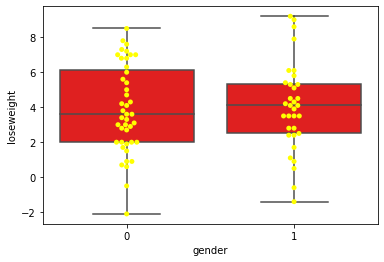

In [ ]:
sns.boxplot(x='gender',y='loseweight',data = a_gen_loseweight, color='red')
sns.swarmplot(x='gender',y='loseweight', data = a_gen_loseweight, color='yellow')
plt.show()

In [ ]:
model_2 = ols('loseweight ~ C(gender)', data=a_gen_loseweight).fit()
anova_table = sm.stats.anova_lm(model_2, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(gender),0.278485,1.0,0.043786,0.834827
Residual,470.650331,74.0,NaN,NaN


In [ ]:
p = {}
p['f_score'] = anova_table['F'][0]
p['p_value'] = anova_table['PR(>F)'][0]
results(p)

,f_score,p_value,KetLuan
,0.043786,0.834827,Chấp nhận H0 với mức ý nghĩa 0.05


Kiểm tra điều kiện cho anova

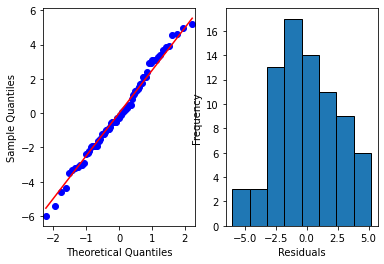

In [ ]:
fig, ax = plt.subplots(1,2)
sm.qqplot(model_2.resid,line='s', ax=ax[0])
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Residuals")

plt.hist(model_2.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
p_v = stats.shapiro(model_2.resid)[1]

In [55]:
print('''Phát biểu giả thiết thống kê:
    N0: Mẫu tuân theo phân phối chuẩn
    N1: Mẫu khống tuân theo phân phối chuẩn''')
if p_v > 0.05:
    print(f'Không có bằng chứng thống kê để bác bỏ giả thiết N0. Điều này ngụ ý Mẫu tuân theo phân phối chuẩn')
else:
    print(f'Có bằng chứng thống kê để bác bỏ giả thiết N0. Điều này ngụ ý Mẫu không tuân theo phân phối chuẩn (N1)')

Phát biểu giả thiết thống kê:
    N0: Mẫu tuân theo phân phối chuẩn
    N1: Mẫu khống tuân theo phân phối chuẩn
Không có bằng chứng thống kê để bác bỏ giả thiết N0. Điều này ngụ ý Mẫu tuân theo phân phối chuẩn
